<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 1 / NOTE 2*

# 📝 Assignment
---

# 다중선형회귀(Multiple Linear Regression)

이번 과제에서도 n211 과제 에서 다루었던 housing price dataset을 가지고 배운 내용을 연습해 보겠습니다.
다음 링크에서 다운로드 받아 사용해 주세요. [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction)

In [1]:
# 데이터는 캐글에서 받으셔도 되고 이 링크에서 불러와도 됩니다.
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [3]:
df.info() # 결측치 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

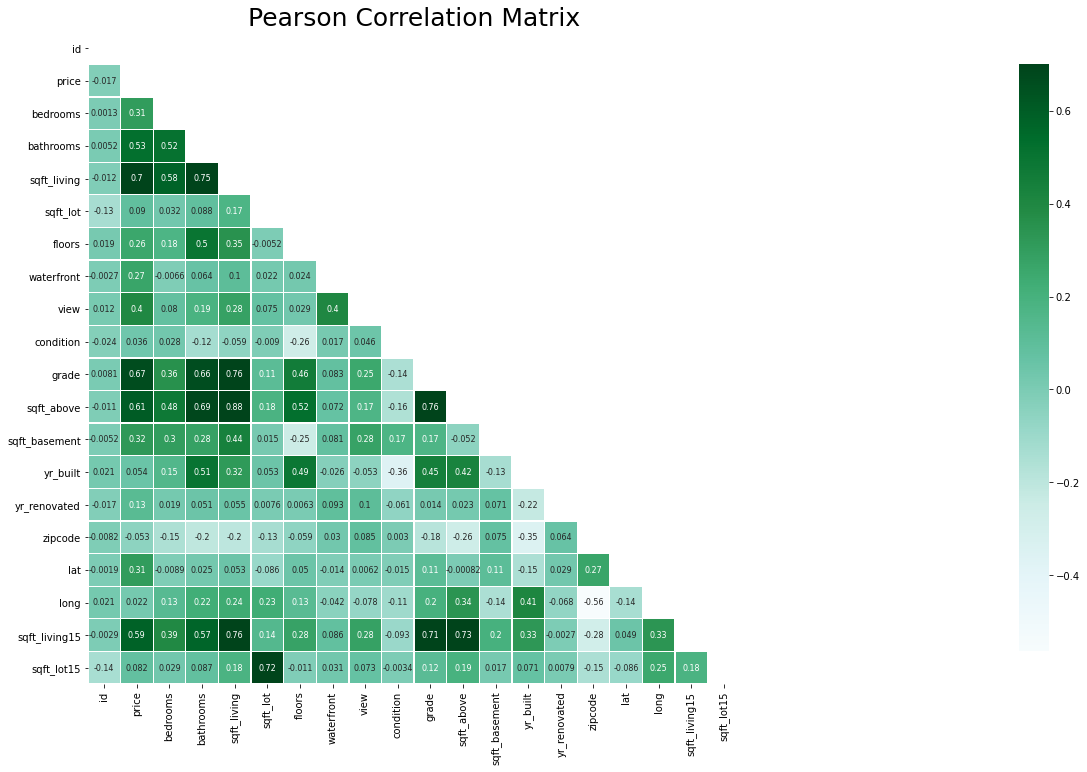

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

mask = np.zeros_like(df.corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(100, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn",
            linecolor='w',annot=True,annot_kws={"size":8},
						mask=mask,cbar_kws={"shrink": .9});

### 1) 데이터는 May 2014 ~ May 2015 의 2년치 데이터입니다. 2015-01-01 부터 큰 날짜의 데이터는 테스트, 그 이외의 데이터는 훈련 데이터셋으로 나누어 주세요
- **훈련데이터 샘플의 갯수를 과제 제출폼에 제출하세요.**

In [5]:
df = df.sort_values(by = 'date').reset_index()  # date 순으로 정렬, 인덱스 초기화
df.date = [int(i[:8]) for i in df.date]         # 연, 월, 일 순으로 숫자로 변경

In [6]:
train_data, test_data = df[df.date < 20150101], df[~(df.date < 20150101)] # test, train 데이터 분리
display(train_data)
display(test_data)

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,16768,5561000190,20140502,437500.0,3,2.25,1970,35100,2.0,0,0,4,9,1970,0,1977,0,98027,47.4635,-121.991,2340,35100
1,9596,472000620,20140502,790000.0,3,2.50,2600,4750,1.0,0,0,4,9,1700,900,1951,0,98117,47.6833,-122.400,2380,4750
2,9587,1024069009,20140502,675000.0,5,2.50,2820,67518,2.0,0,0,3,8,2820,0,1979,0,98029,47.5794,-122.025,2820,48351
3,20602,7853361370,20140502,555000.0,4,2.50,3310,6500,2.0,0,0,3,8,3310,0,2012,0,98065,47.5150,-121.870,2380,5000
4,11577,5056500260,20140502,440000.0,4,2.25,2160,8119,1.0,0,0,3,8,1080,1080,1966,0,98006,47.5443,-122.177,1850,9000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14628,4081,3321069006,20141231,905000.0,3,2.50,3520,237402,2.5,0,0,3,9,3520,0,2004,0,98092,47.2687,-122.056,2310,165963
14629,4882,1545803890,20141231,240000.0,3,1.75,1590,7931,1.0,0,0,3,7,1190,400,1979,0,98038,47.3628,-122.050,1680,7931
14630,6500,6117900010,20141231,755000.0,3,3.25,3450,15586,2.0,0,0,3,11,2690,760,1989,0,98166,47.4294,-122.343,3560,15046
14631,13152,226059161,20141231,575000.0,4,2.50,2280,27441,2.0,0,0,3,8,2280,0,1996,0,98072,47.7628,-122.123,2350,35020


,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
14633,19910,7853360990,20150102,430000.0,3,2.50,1950,4949,2.0,0,0,3,7,1950,0,2009,0,98065,47.5155,-121.870,2200,5740
14634,658,259900160,20150102,748000.0,4,3.50,2770,3330,2.0,0,0,3,8,1970,800,2001,0,98052,47.6327,-122.109,2180,3380
14635,21189,8648900010,20150102,530200.0,4,2.50,1880,3853,2.0,0,0,3,8,1880,0,2010,0,98027,47.5636,-122.094,1890,3078
14636,120,7278700070,20150102,660000.0,3,2.50,2400,6474,1.0,0,2,3,8,1560,840,1964,0,98177,47.7728,-122.386,2340,10856
14637,6633,7205930050,20150102,782000.0,4,3.50,3780,7769,2.0,0,0,3,9,3110,670,2001,0,98052,47.6910,-122.129,3310,7945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,7898,1422700040,20150514,183000.0,3,1.00,1170,7320,1.0,0,0,3,7,1170,0,1962,0,98188,47.4685,-122.282,2040,7320
21609,928,8730000270,20150514,359000.0,2,2.75,1370,1140,2.0,0,0,3,8,1080,290,2009,0,98133,47.7052,-122.343,1370,1090
21610,5637,7923600250,20150515,450000.0,5,2.00,1870,7344,1.5,0,0,3,7,1870,0,1960,0,98007,47.5951,-122.144,1870,7650
21611,13053,5101400871,20150524,445500.0,2,1.75,1390,6670,1.0,0,0,3,6,720,670,1941,0,98115,47.6914,-122.308,920,6380


### 2) 두 특성(bathrooms, sqft_living)을 사용해서 다중선형회귀 모델을 만들어 보세요
- 학습시 Parameters는 모두 기본값으로 합니다.
- **테스트세트의 MAE 값을 과제 제출폼에 제출하세요.**

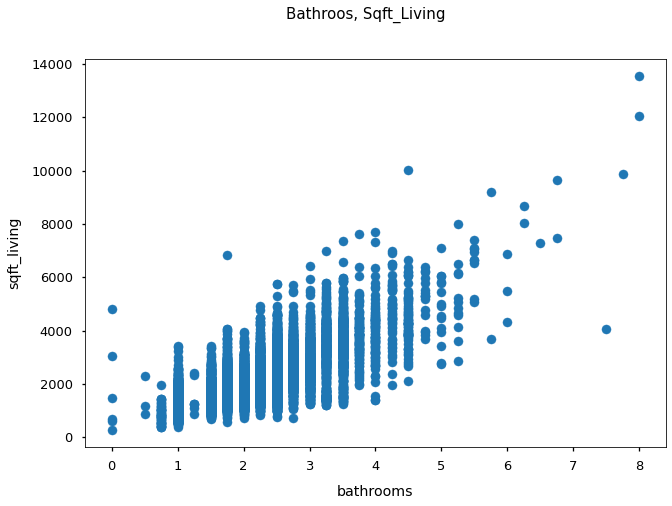

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

style.use('seaborn-talk')
fig = plt.figure()

ax = fig.gca()

ax.scatter(train_data['bathrooms'], train_data['sqft_living'])
ax.set_xlabel('bathrooms', labelpad=12)
ax.set_ylabel('sqft_living', labelpad=10)

plt.suptitle('Bathroos, Sqft_Living', fontsize=15)
plt.show()

In [8]:
features = ['bathrooms', 'sqft_living']
# 다중모델 학습을 위한 특성
X_train = train_data[features]
X_test = test_data[features]

# label 정의
target = 'price'
y_train = train_data[target]
y_test = test_data[target]

# SalePrice 평균값으로 예측(기준모델)
predict = y_train.mean()

# 모델 fit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'훈련 에러: {mae:.2f}')

# 테스트 데이터에 적용해 봅시다 
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'테스트 에러: {mae:.2f}')



훈련 에러: 170777.34
테스트 에러: 179252.53


### 3) 모델의 회귀계수(coefficients)와 절편(intercept)을 확인해 보세요.
- **sqft_living의 회귀계수를 과제 제출폼에 제출하세요.**

In [9]:
## 절편(intercept)과 계수들(coefficients)
print('절편 =', model.intercept_, '계수들 =', model.coef_)

## 회귀식을 만들어 봅시다.
b0 = model.intercept_
b1, b2 = model.coef_

print(f'y = {b0:.0f} + {b1:.0f}x\u2081 + {b2:.0f}x\u2082')

절편 = -50243.56279640319 계수들 = [-5158.92591411   286.13753555]
y = -50244 + -5159x₁ + 286x₂


### 4) MSE, RMSE, MAE, $R^2$ 를 훈련/테스트 데이터에 대해 확인해 보세요
- **테스트 데이터에 대한 R^2 값을 과제 제출폼에 제출하세요.**

In [10]:
# Price의 평균을 기준모델로 사용
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

base = train_data['price'].mean()
y_train = train_data['price']
y_test = test_data['price']

# 기준모델의 MAE, MSE, RMSE, R2 계산
mae_base = mean_absolute_error(y_train, [base]*len(y_train))
mse_base = mean_squared_error(y_train, [base]*len(y_train))
rmse_base = math.sqrt(mse_base)
r_base = r2_score(y_train, [base]*len(y_train))

print('Base Model의 MAE: ', mae_base)
print('Base Model의 MSE: ', mse_base)
print('Base Model의 RMSE: ', rmse_base)
print('Base Model의 R^2: ', r_base)

Base Model의 MAE:  233570.83476495324
Base Model의 MSE:  136271781263.34636
Base Model의 RMSE:  369150.0795927672
Base Model의 R^2:  0.0


In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# 다중선형모델
features = ['bathrooms', 'sqft_living']
x_train = train_data[features]
x_test = test_data[features]

# model fit
model.fit(x_train, y_train)

# Train 예측 결과값의 MAE, MSE, RMSE, R2 계산
y_pred = model.predict(x_train)
mae_train = mean_absolute_error(y_train, y_pred)
mse_train = mean_squared_error(y_train, y_pred)
rmse_train = math.sqrt(mse_train)
r_train = r2_score(y_train, y_pred)
print('Train data의 MAE: ', mae_train)
print('Train data의 MSE: ', mse_train)
print('Train data의 RMSE: ', rmse_train)
print('Train data의 R^2: ', r_train)

# Test 예측 결과값의 MAE, MSE, RMSE, R2 계산
y_pred_test = model.predict(x_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = math.sqrt(mse_test)
r_test = r2_score(y_test, y_pred_test)
print('\nTest data의 MAE: ', mae_test)
print('Test data의 MSE: ', mse_test)
print('Test data의 RMSE: ', rmse_test)
print('Test data의 R^2: ', r_test)

Train data의 MAE:  170777.34212565765
Train data의 MSE:  67099053309.95361
Train data의 RMSE:  259034.8496051325
Train data의 R^2:  0.5076085988757706

Test data의 MAE:  179252.52593261775
Test data의 MSE:  71083994178.75656
Test data의 RMSE:  266615.81757044455
Test data의 R^2:  0.4599930019989451


In [12]:
# from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score
# from IPython.display import display
# from matplotlib.patches import Rectangle

# def evaluation_metrics(df, feature, target, slope, intercept):
#     """
#     2d 선형회귀직선과 제곱오차(squared errors)를 확인하기 위한 함수
#     df : Pandas 데이터프레임
#     feature : 특징 열
#     target : 타겟 열
#     slope : 선형방정식의 기울기
#     intercept : 선형방정식의 y 절편
#     """
    
#     x = df[feature]
#     y = df[target]
    
#     # plot 데이터
#     ax = plt.axes()
#     df.plot.scatter(feature, target, ax=ax)
    
#     # 예측
#     y_pred = slope * x + intercept
    
#     # plot 예측
#     ax.plot(x, y_pred)
    
#     # Plot 제곱오차(MSE)
#     x_left, x_right = ax.get_xlim() # x-axis view limits
#     y_bottom, y_top = ax.get_ylim()
#     scale = (x_right - x_left) / (y_top - y_bottom)

#     # for f, t, p in zip(x, y, y_pred):
#     #     xy = (f, min(t, p))
#     #     h = abs(t - p)
#     #     w_scaled = h * scale
#     #     ax.add_patch(Rectangle(xy=xy, width=w_scaled, height=h, alpha=0.2))
    
#     # 회귀방정식 평가지표
#     mse = mean_squared_error(y, y_pred)
#     mae = mean_absolute_error(y, y_pred)
#     rmse = mse ** 0.5
#     r2 = r2_score(y, y_pred)

#     display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))

# feature = 'sqft_living'
# evaluation_metrics(df, feature, 'price', 0, df['price'].mean())

## 🔥도전과제

### 5) 두가지 이상 특성을 선택하여 특성공학(feature engineering)을 진행합니다. (kaggle notebook을 참고하여 중요한 특성을 고르는 것이 힌트입니다.)
- EDA를 자세히 진행하세요
- 특성공학 과정을 자세히 기술하세요
- 특성공학을 거친 특성을 포함해 다수의 특성을 사용한 모델을 학습하고 테스트 데이터에 대해 MSE, RMSE, MAE, R2 스코어를 계산하고 분석하세요
- 만들어진 회귀계수를 사용해 모델을 설명하세요.
- 모델이 과적합인지/과소적합인지 설명하세요.
- 메신저 general 채널에서 4개 스코어를 제시하고 본인이 고른 특성, 특성공학 방법 등을 간략하게 공유하세요

In [13]:
# EDA
display(train_data)
display(test_data)

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,16768,5561000190,20140502,437500.0,3,2.25,1970,35100,2.0,0,0,4,9,1970,0,1977,0,98027,47.4635,-121.991,2340,35100
1,9596,472000620,20140502,790000.0,3,2.50,2600,4750,1.0,0,0,4,9,1700,900,1951,0,98117,47.6833,-122.400,2380,4750
2,9587,1024069009,20140502,675000.0,5,2.50,2820,67518,2.0,0,0,3,8,2820,0,1979,0,98029,47.5794,-122.025,2820,48351
3,20602,7853361370,20140502,555000.0,4,2.50,3310,6500,2.0,0,0,3,8,3310,0,2012,0,98065,47.5150,-121.870,2380,5000
4,11577,5056500260,20140502,440000.0,4,2.25,2160,8119,1.0,0,0,3,8,1080,1080,1966,0,98006,47.5443,-122.177,1850,9000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14628,4081,3321069006,20141231,905000.0,3,2.50,3520,237402,2.5,0,0,3,9,3520,0,2004,0,98092,47.2687,-122.056,2310,165963
14629,4882,1545803890,20141231,240000.0,3,1.75,1590,7931,1.0,0,0,3,7,1190,400,1979,0,98038,47.3628,-122.050,1680,7931
14630,6500,6117900010,20141231,755000.0,3,3.25,3450,15586,2.0,0,0,3,11,2690,760,1989,0,98166,47.4294,-122.343,3560,15046
14631,13152,226059161,20141231,575000.0,4,2.50,2280,27441,2.0,0,0,3,8,2280,0,1996,0,98072,47.7628,-122.123,2350,35020


,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
14633,19910,7853360990,20150102,430000.0,3,2.50,1950,4949,2.0,0,0,3,7,1950,0,2009,0,98065,47.5155,-121.870,2200,5740
14634,658,259900160,20150102,748000.0,4,3.50,2770,3330,2.0,0,0,3,8,1970,800,2001,0,98052,47.6327,-122.109,2180,3380
14635,21189,8648900010,20150102,530200.0,4,2.50,1880,3853,2.0,0,0,3,8,1880,0,2010,0,98027,47.5636,-122.094,1890,3078
14636,120,7278700070,20150102,660000.0,3,2.50,2400,6474,1.0,0,2,3,8,1560,840,1964,0,98177,47.7728,-122.386,2340,10856
14637,6633,7205930050,20150102,782000.0,4,3.50,3780,7769,2.0,0,0,3,9,3110,670,2001,0,98052,47.6910,-122.129,3310,7945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,7898,1422700040,20150514,183000.0,3,1.00,1170,7320,1.0,0,0,3,7,1170,0,1962,0,98188,47.4685,-122.282,2040,7320
21609,928,8730000270,20150514,359000.0,2,2.75,1370,1140,2.0,0,0,3,8,1080,290,2009,0,98133,47.7052,-122.343,1370,1090
21610,5637,7923600250,20150515,450000.0,5,2.00,1870,7344,1.5,0,0,3,7,1870,0,1960,0,98007,47.5951,-122.144,1870,7650
21611,13053,5101400871,20150524,445500.0,2,1.75,1390,6670,1.0,0,0,3,6,720,670,1941,0,98115,47.6914,-122.308,920,6380


In [14]:
df.info() # 결측치 확인 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  int64  
 3   price          21613 non-null  float64
 4   bedrooms       21613 non-null  int64  
 5   bathrooms      21613 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

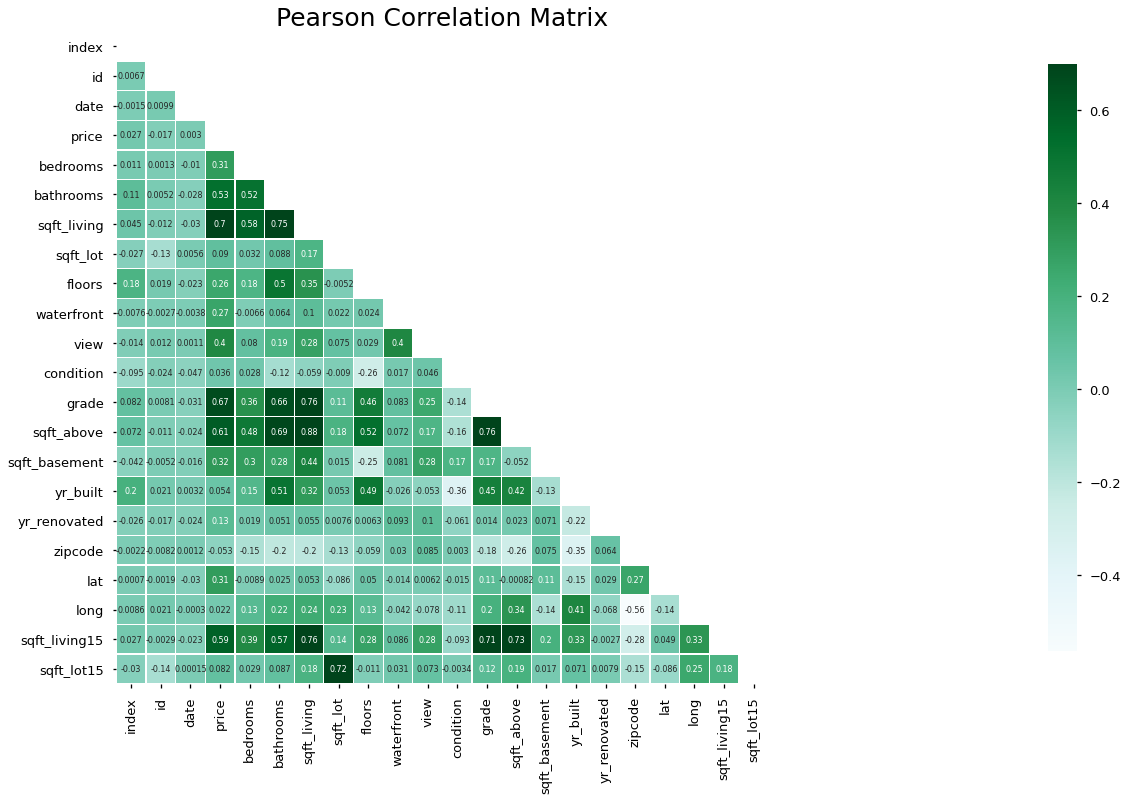

In [15]:
# 피어슨 상관계수 매트릭스
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

mask = np.zeros_like(df.corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(100, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn",
            linecolor='w',annot=True,annot_kws={"size":8},
						mask=mask,cbar_kws={"shrink": .9});

## 참고자료
* [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
* ["A Few Useful Things to Know about Machine Learning"](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)
* [Machine Learning and AI via Brain simulations](https://forum.stanford.edu/events/2011/2011slides/plenary/2011plenaryNg.pdf)
* [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf),  Chapter 3.1, Simple Linear Regression, & Chapter 3.2, Multiple Linear Regression
* [Brandon Foltz, Statistics 101: Simple Linear Regression](https://www.youtube.com/watch?v=ZkjP5RJLQF4)